## Importing Dependencies


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Loading Data

In [2]:
train=pd.read_csv('/resources/data/Data/train.csv')
test=pd.read_csv('/resources/data/Data/test.csv')
train.head(10)

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.00950,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.27240,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.47250,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.57010,1
4,3682652,24600,NaN,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.50130,0
5,3682653,15000,65742.0,86608.0,0.0,0.0,NaN,0.0,289.581891,20.0,28.285563,0,0,0,1.51770,0
6,3682654,22800,75253.0,106166.0,1.0,0.0,NaN,0.0,176.339376,24.0,38.266594,0,0,1,2.43220,0
7,3682655,23200,133766.0,174085.0,NaN,3.0,26.0,3.0,333.409840,28.0,30.778638,0,0,0,0.82074,0
8,3682656,11900,117952.0,125305.0,1.0,5.0,5.0,0.0,182.172065,18.0,33.210397,0,0,0,2.23040,0
9,3682657,13700,55763.0,87480.0,1.0,4.0,9.0,0.0,194.766667,20.0,NaN,0,0,0,1.24350,0


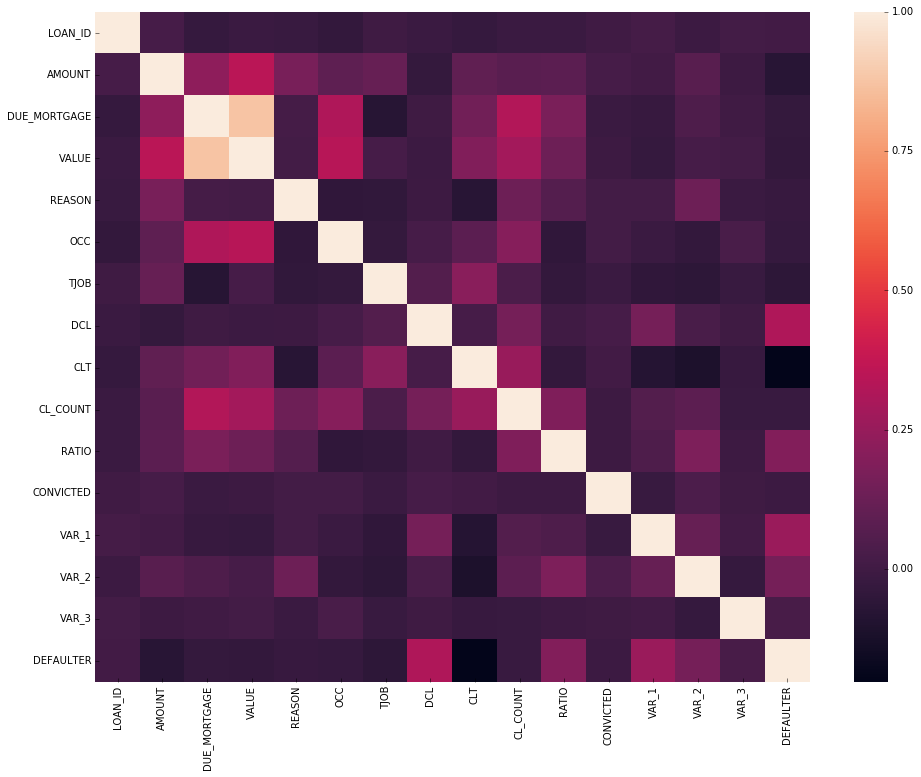

In [3]:
import matplotlib.pyplot as plt
corr=train.corr()
%matplotlib inline
plt.subplots(figsize=(16,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [4]:
##From the above heatmap, we can clearly see that there's a correlation between the two factors : due_mortgage and value. 

In [5]:
r=train["DUE_MORTGAGE"]/train["VALUE"]
r.head(5)

0    0.730078
1    0.744237
2    0.734048
3    0.890898
4         NaN
dtype: float64

In [6]:
ratio=r.mean()
ratio

0.71110958322714857

In [7]:
##Ratio will be used to find out missing values of due_mortgage and value (only if one of them is missing).

## Combining Test and Train Datasets

In [8]:
#combining test and train datasets

df= pd.concat([train, test], axis=0, join='outer')

## Preprocessing - Handling Missing Values

In [9]:

df.isnull().sum()

AMOUNT             0
CLT              308
CL_COUNT         222
CONVICTED          0
DCL              580
DEFAULTER       2384
DUE_MORTGAGE     518
LOAN_ID            0
OCC              279
RATIO           1267
REASON           252
TEST_ID         3576
TJOB             515
VALUE            112
VAR_1              0
VAR_2              0
VAR_3              0
dtype: int64

In [10]:

#VALUE and DUE_MORTGAGE are in a ratio
#New feature was added in df_new 

df_new=(df.loc[:,['DUE_MORTGAGE', 'VALUE']]).dropna()
df_new['ratio'] = df_new['VALUE'] / df_new['DUE_MORTGAGE']

VbyD = df_new.loc[:,'ratio'].mean()

print(VbyD)

1.71233359689


In [11]:
#When both the features of Due_mortgage and value are Nan, 
#individual means of the columns of Due_mortgage and value are calcuated
#missing values of both the columns were calculated using VbyD

df.loc[df['DUE_MORTGAGE'].isnull() & df['VALUE'].isnull(), 'DUE_MORTGAGE'] = df['DUE_MORTGAGE'].mean()
df.loc[df['DUE_MORTGAGE'].isnull() & df['VALUE'].isnull(), 'VALUE'] = df['VALUE'].mean()

df['DUE_MORTGAGE'].fillna(df['VALUE']/VbyD, inplace=True)
df['VALUE'].fillna(df['DUE_MORTGAGE']*VbyD, inplace=True)

In [12]:
df.isnull().sum()

AMOUNT             0
CLT              308
CL_COUNT         222
CONVICTED          0
DCL              580
DEFAULTER       2384
DUE_MORTGAGE       0
LOAN_ID            0
OCC              279
RATIO           1267
REASON           252
TEST_ID         3576
TJOB             515
VALUE              0
VAR_1              0
VAR_2              0
VAR_3              0
dtype: int64

In [13]:
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
df['OCC'].fillna(df['OCC'].mode()[0], inplace=True)
df['DCL'].fillna(df['DCL'].mode()[0], inplace=True)
df['CLT'].fillna(df['CLT'].mean(), inplace=True)
df['TJOB'].fillna(df['TJOB'].mean(), inplace=True)  #doubtful
df['CL_COUNT'].fillna(df['CL_COUNT'].mean(), inplace=True)
df['RATIO'].fillna(-1, inplace=True)
# -1 is dummy value. RF model will handle these missing values of ratio accordingly.
df.isnull().sum()

AMOUNT             0
CLT                0
CL_COUNT           0
CONVICTED          0
DCL                0
DEFAULTER       2384
DUE_MORTGAGE       0
LOAN_ID            0
OCC                0
RATIO              0
REASON             0
TEST_ID         3576
TJOB               0
VALUE              0
VAR_1              0
VAR_2              0
VAR_3              0
dtype: int64

## Feature Engineering

In [14]:

df['income']=df['AMOUNT']/df['RATIO'] #already given

s=df[df['income']>0].groupby(['OCC']).mean()['income']

df.loc[(df['income']<0) & (df['OCC']==0.0), 'income'] = s[0.0]

df.loc[(df['income']<0) & (df['OCC']==1.0), 'income'] = s[1.0]

df.loc[(df['income']<0) & (df['OCC']==2.0), 'income'] = s[2.0]

df.loc[(df['income']<0) & (df['OCC']==3.0), 'income'] = s[3.0]

df.loc[(df['income']<0) & (df['OCC']==4.0), 'income'] = s[4.0]

df.loc[(df['income']<0) & (df['OCC']==5.0), 'income'] = s[5.0]

df['RATIO']=df['AMOUNT']/df['income']

#New feature - Due_mortgage/value

df['ratio_1']=df['DUE_MORTGAGE']/df['VALUE']

## Modelling

## Splitting train and validation set

In [15]:

features = ['AMOUNT', 'CLT', 'CL_COUNT', 'CONVICTED', 'DCL',
       'DUE_MORTGAGE', 'OCC', 'RATIO', 'REASON', 'TJOB',
       'VALUE', 'VAR_1', 'VAR_2', 'VAR_3', 'income', 'ratio_1']

X = df[df['TEST_ID'].isnull()].loc[:,features]
Y = df[df['TEST_ID'].isnull()].loc[:,'DEFAULTER']

X_test_resplit = df[df['TEST_ID'].notnull()].loc[:,features]

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split( X, Y,
                                        test_size=0.33, random_state=12, stratify=Y)pred_test = model.predict_proba(X_test_sub)[:,1]

SyntaxError: invalid syntax (<ipython-input-15-0b7f6c8ad0bc>, line 13)

## RF Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=300 ,max_leaf_nodes = 15,max_depth=4,
                              min_samples_leaf=11, min_samples_split= 20,
                              n_jobs=-1, random_state =7)

model.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [ ]:
#Prediction
s=model.predict_proba(X_valid)[:,1]
s_class = model.predict(X_valid)
roc_auc_score(s_class, Y_valid)

In [ ]:
#Prediciting probability of defaulter value = 1 from test set.
predict_test = model.predict_proba(X_test_resplit)[:,1]
predict_test

In [ ]:
test['DEFAULTER'] = predict_test
test.loc[:,['LOAN_ID', 'DEFAULTER']].to_csv('/resources/data/Data/final.csv')